In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500

batch_size = 32
print("讀取資料...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)
print(len(input_train), 'train sequence')
print(len(input_test), 'test sequence')
print('pad sequence (sample x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen) #只看每個評論前五百個字，不足就補

input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

讀取資料...
17473536/17464789 [==============================] - 0s 0us/step
25000 train sequence
25000 test sequence
pad sequence (sample x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [4]:
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Dense
#from keras import models
from keras.models import Sequential
from keras .callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience=2) 

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',
       metrics=['acc'])
history = model.fit(input_train,
           y_train,
           epochs=10,
           batch_size=128,
           validation_split=0.2,
           callbacks=[early_stopping])

Epoch 1/10
157/157 [==============================] - 31s 190ms/step - loss: 0.6663 - acc: 0.5868 - val_loss: 0.5970 - val_acc: 0.6704
Epoch 2/10
157/157 [==============================] - 30s 191ms/step - loss: 0.4282 - acc: 0.8159 - val_loss: 0.4511 - val_acc: 0.7856
Epoch 3/10
157/157 [==============================] - 28s 176ms/step - loss: 0.3005 - acc: 0.8806 - val_loss: 0.3602 - val_acc: 0.8556
Epoch 4/10
157/157 [==============================] - 31s 199ms/step - loss: 0.2423 - acc: 0.9074 - val_loss: 0.3819 - val_acc: 0.8338
Epoch 5/10
157/157 [==============================] - 43s 276ms/step - loss: 0.1729 - acc: 0.9395 - val_loss: 0.3829 - val_acc: 0.8584


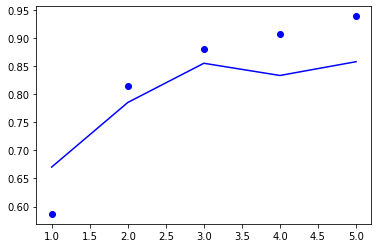

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, (len(acc)+1))

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')